In [1]:
#importing all the required libraries
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib 
import sklearn
import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [2]:

df = pd.read_csv('andhra_linear_total.csv')
xs=df.iloc[:,0]
ys=df.iloc[:,1:]
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.4, random_state=0)
print("Year\n"+str(X_train)+"\n\nCrimes\n"+str(y_train))
print("For test data \nYear\n"+str(X_test)+"\n\nCrimes\n"+str(y_test))

Year
8    2009
1    2002
7    2008
9    2010
3    2004
0    2001
5    2006
Name: Year, dtype: int64

Crimes
   Rape  Kidnapping and Abduction  Dowry Deaths  \
8  1188                        28           546   
1  1002                        38           449   
7  1257                        47           556   
9  1362                        46           588   
3  1016                        41           512   
0   871                        55           420   
5  1049                        51           519   

   Assault on women with intent to outrage her modesty  \
8                                               5147     
1                                               3799     
7                                               4730     
9                                               4634     
3                                               3817     
0                                               3544     
5                                               4534     

   Insult to modes

In [3]:
len(X_train),len(y_train)

(7, 7)

In [4]:
x_xtrain_insult=X_train
#print(x_xtrain_rape)
y_ytrain_insult=y_train.iloc[:,4]
print(y_ytrain_insult)
#plt.scatter(x_xtrain_rape,y_ytrain_rape)
#plt.ylabel("Rape crime Rate")
#plt.xlabel("Year")
#plt.show()

8    3520
1    2024
7    3551
9    4562
3    2310
0    2271
5    2411
Name: Insult to modesty of Women, dtype: int64


In [5]:
def slope_intercept(x_val,y_val):
  x=np.array(x_val)
  y=np.array(y_val)
  m=( ( (np.mean(x)*np.mean(y)) - np.mean(x*y) ) /
    ((np.mean(x)*np.mean(x))-np.mean(x*x)) )
  m=round(m,2)
  b=(np.mean(y)-np.mean(x)*m)
  b=round(b,2)
  
  return m,b

slope_intercept(x_xtrain_insult,y_ytrain_insult)

(241.58, -481590.6)

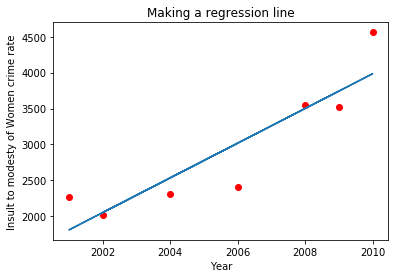

In [6]:
m,b=slope_intercept(x_xtrain_insult,y_ytrain_insult)
reg_line=[(m*x)+b for x in x_xtrain_insult]
plt.scatter(x_xtrain_insult,y_ytrain_insult,color="red")
plt.plot(x_xtrain_insult,reg_line)
plt.ylabel("Insult to modesty of Women crime rate")
plt.xlabel("Year")
plt.title("Making a regression line")
plt.savefig('insult_before_pred.png')

In [7]:
x_xtest_insult=X_test
y_ytest_insult=y_test.iloc[:,-3]
print("X_test(Year)")
for x in np.nditer(x_xtest_insult):
  print(x)
print("\n\nY_test(Actual)")
for x in np.nditer(y_ytest_insult):
  print(x)
ypredd=m*x_xtest_insult+b
print("\n\nY_Predicted")
for x in np.nditer(ypredd):
  print(int(x))

X_test(Year)
2007
2012
2005
2011
2003


Y_test(Actual)
3316
3714
2508
3658
2286


Y_Predicted
3260
4468
2777
4226
2294


Years: [2009 2002 2008 2010 2004 2001 2006 2007 2012 2005 2011 2003]
Insult: 
[3520.   2024.   3551.   4562.   2310.   2271.   2411.   3260.46 4468.36
 2777.3  4226.78 2294.14]


Text(0.5, 1.0, 'Making a regression line')

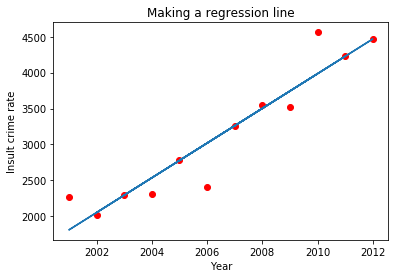

In [8]:
trmergedlist0=np.concatenate((x_xtrain_insult,x_xtest_insult), axis=0)
print("Years: "+str(trmergedlist0))

reg_line=[(m*x)+b for x in trmergedlist0]

temergedlist0=np.concatenate((y_ytrain_insult,ypredd), axis=0)
print("Insult: ")
    
print(str(temergedlist0))

plt.scatter(trmergedlist0,temergedlist0,color="red")
plt.plot(trmergedlist0,reg_line)
plt.ylabel("Insult crime rate")
plt.xlabel("Year")
plt.title("Making a regression line")

In [9]:
years = np.array([2013,2014,2015,2016,2017,2018,2019,2020])
df1=pd.DataFrame(years)
#print(df1)
ypredd1=(m*years+b)


In [10]:
trmergedlist=np.concatenate((x_xtrain_insult,x_xtest_insult, years), axis=0)
print("Years: "+str(trmergedlist))

#print(temergedlist)
#m,b=slope_intercept(trmergedlist,temergedlist)

reg_line=[(m*x)+b for x in trmergedlist]

temergedlist=np.concatenate((y_ytrain_insult,y_ytest_insult,ypredd1), axis=0)
print("Insult to modesty of Women: ")
    
print(str(temergedlist))


Years: [2009 2002 2008 2010 2004 2001 2006 2007 2012 2005 2011 2003 2013 2014
 2015 2016 2017 2018 2019 2020]
Insult to modesty of Women: 
[3520.   2024.   3551.   4562.   2310.   2271.   2411.   3316.   3714.
 2508.   3658.   2286.   4709.94 4951.52 5193.1  5434.68 5676.26 5917.84
 6159.42 6401.  ]


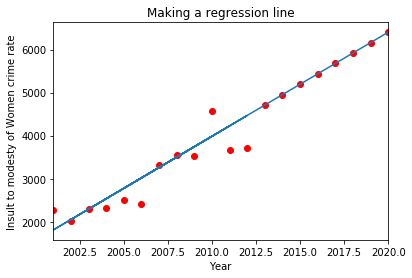

In [11]:
plt.scatter(trmergedlist,temergedlist,color="red")
plt.plot(trmergedlist,reg_line)
plt.xlim((2001,2020))
#plt.ylim((800,1900))
plt.ylabel("Insult to modesty of Women crime rate")
plt.xlabel("Year")
plt.title("Making a regression line")
plt.savefig('insult_after_pred.png')